In [25]:
%matplotlib inline
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

from IPython.display import HTML
from IPython.display import Image
from IPython import display

# rc('animation', html='jshtml')
# https://stackoverflow.com/questions/59454831/recursive-animation-matplotlib

TypeError: __init__() got an unexpected keyword argument 'value'

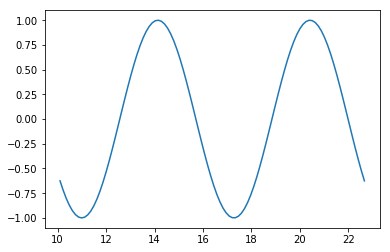

In [28]:
class waveanim:
    
     
    def __init__(self):
        n = 100
        self.wf = np.zeros((n,2))
        self.next_wf()
        fig, ax = plt.subplots(1)
        self.line, = ax.plot([], [], lw=2)
        
        self.anim = animation.FuncAnimation(fig, self.animate, init_func=self.init, 
                                            frames=100, interval=25, blit=True)

    def init(self):
        self.line.set_data([], [])
        return (self.line,)

    def next_wf(self):
        offset = self.wf[0,0] + 0.1
        self.wf[:,0] = np.linspace(offset, np.pi*4+offset, self.wf.shape[0])
        self.wf[:,1] = np.sin(self.wf[:,0])

    def animate(self, frame):
        self.next_wf()
        plt.cla()
        plot, = plt.plot(self.wf[:,0], self.wf[:,1])
        return plot,
    
    def tohtml(self):
        #HTML(self.anim.to_jshtml());
        #(self.anim.to_html5_video());
                
        self.anim.save('./animation.gif', writer='imagemagick')
        
        
        animatedGif = "./animation.gif" #path relative to your notebook
        file = open(animatedGif , "rb")
        image = file.read()
        progress= Image(
            value=image,
            format='gif',
            width=100,
            height=100)
        display.display(progress)

w = waveanim()

w.tohtml()